###  Context

It is a highly labour-intensive industry with lots of manual processes. Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies. So, it is highly desirable among the decision makers in the garments industry to track, analyse and predict the productivity performance of the working teams in their factories.

### IMPORT LIBRARIES AND DATASET

In [242]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [243]:
df = pd.read_csv('F:\Data science\Datasets\Garment productivity/garments_worker_productivity.csv')

In [244]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### Attribute Information

01 date : Date in MM-DD-YYYY
02 day : Day of the Week
03 quarter : A portion of the month. A month was divided into four quarters
04 department : Associated department with the instance
05 team_no : Associated team number with the instance
06 no_of_workers : Number of workers in each team
07 no_of_style_change : Number of changes in the style of a particular product
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.
09 smv : Standard Minute Value, it is the allocated time for a task
10 wip : Work in progress. Includes the number of unfinished items for products
11 over_time : Represents the amount of overtime by each team in minutes
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
13 idle_time : The amount of time when the production was interrupted due to several reasons
14 idle_men : The number of workers who were idle due to production interruption
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.

In [245]:
df.shape

(1197, 15)

In [246]:
df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

In [247]:
def change_date(col):
    df[col] = pd.to_datetime(df[col])

In [248]:
for i in ['date']:
    change_date(i)

In [249]:
df.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

### VISUALIZE DATASET

In [250]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [251]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


In [252]:
int(df['wip'].mean())

1190

In [253]:
df.fillna(int(df['wip'].mean()),inplace=True)

In [254]:
df.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

In [255]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


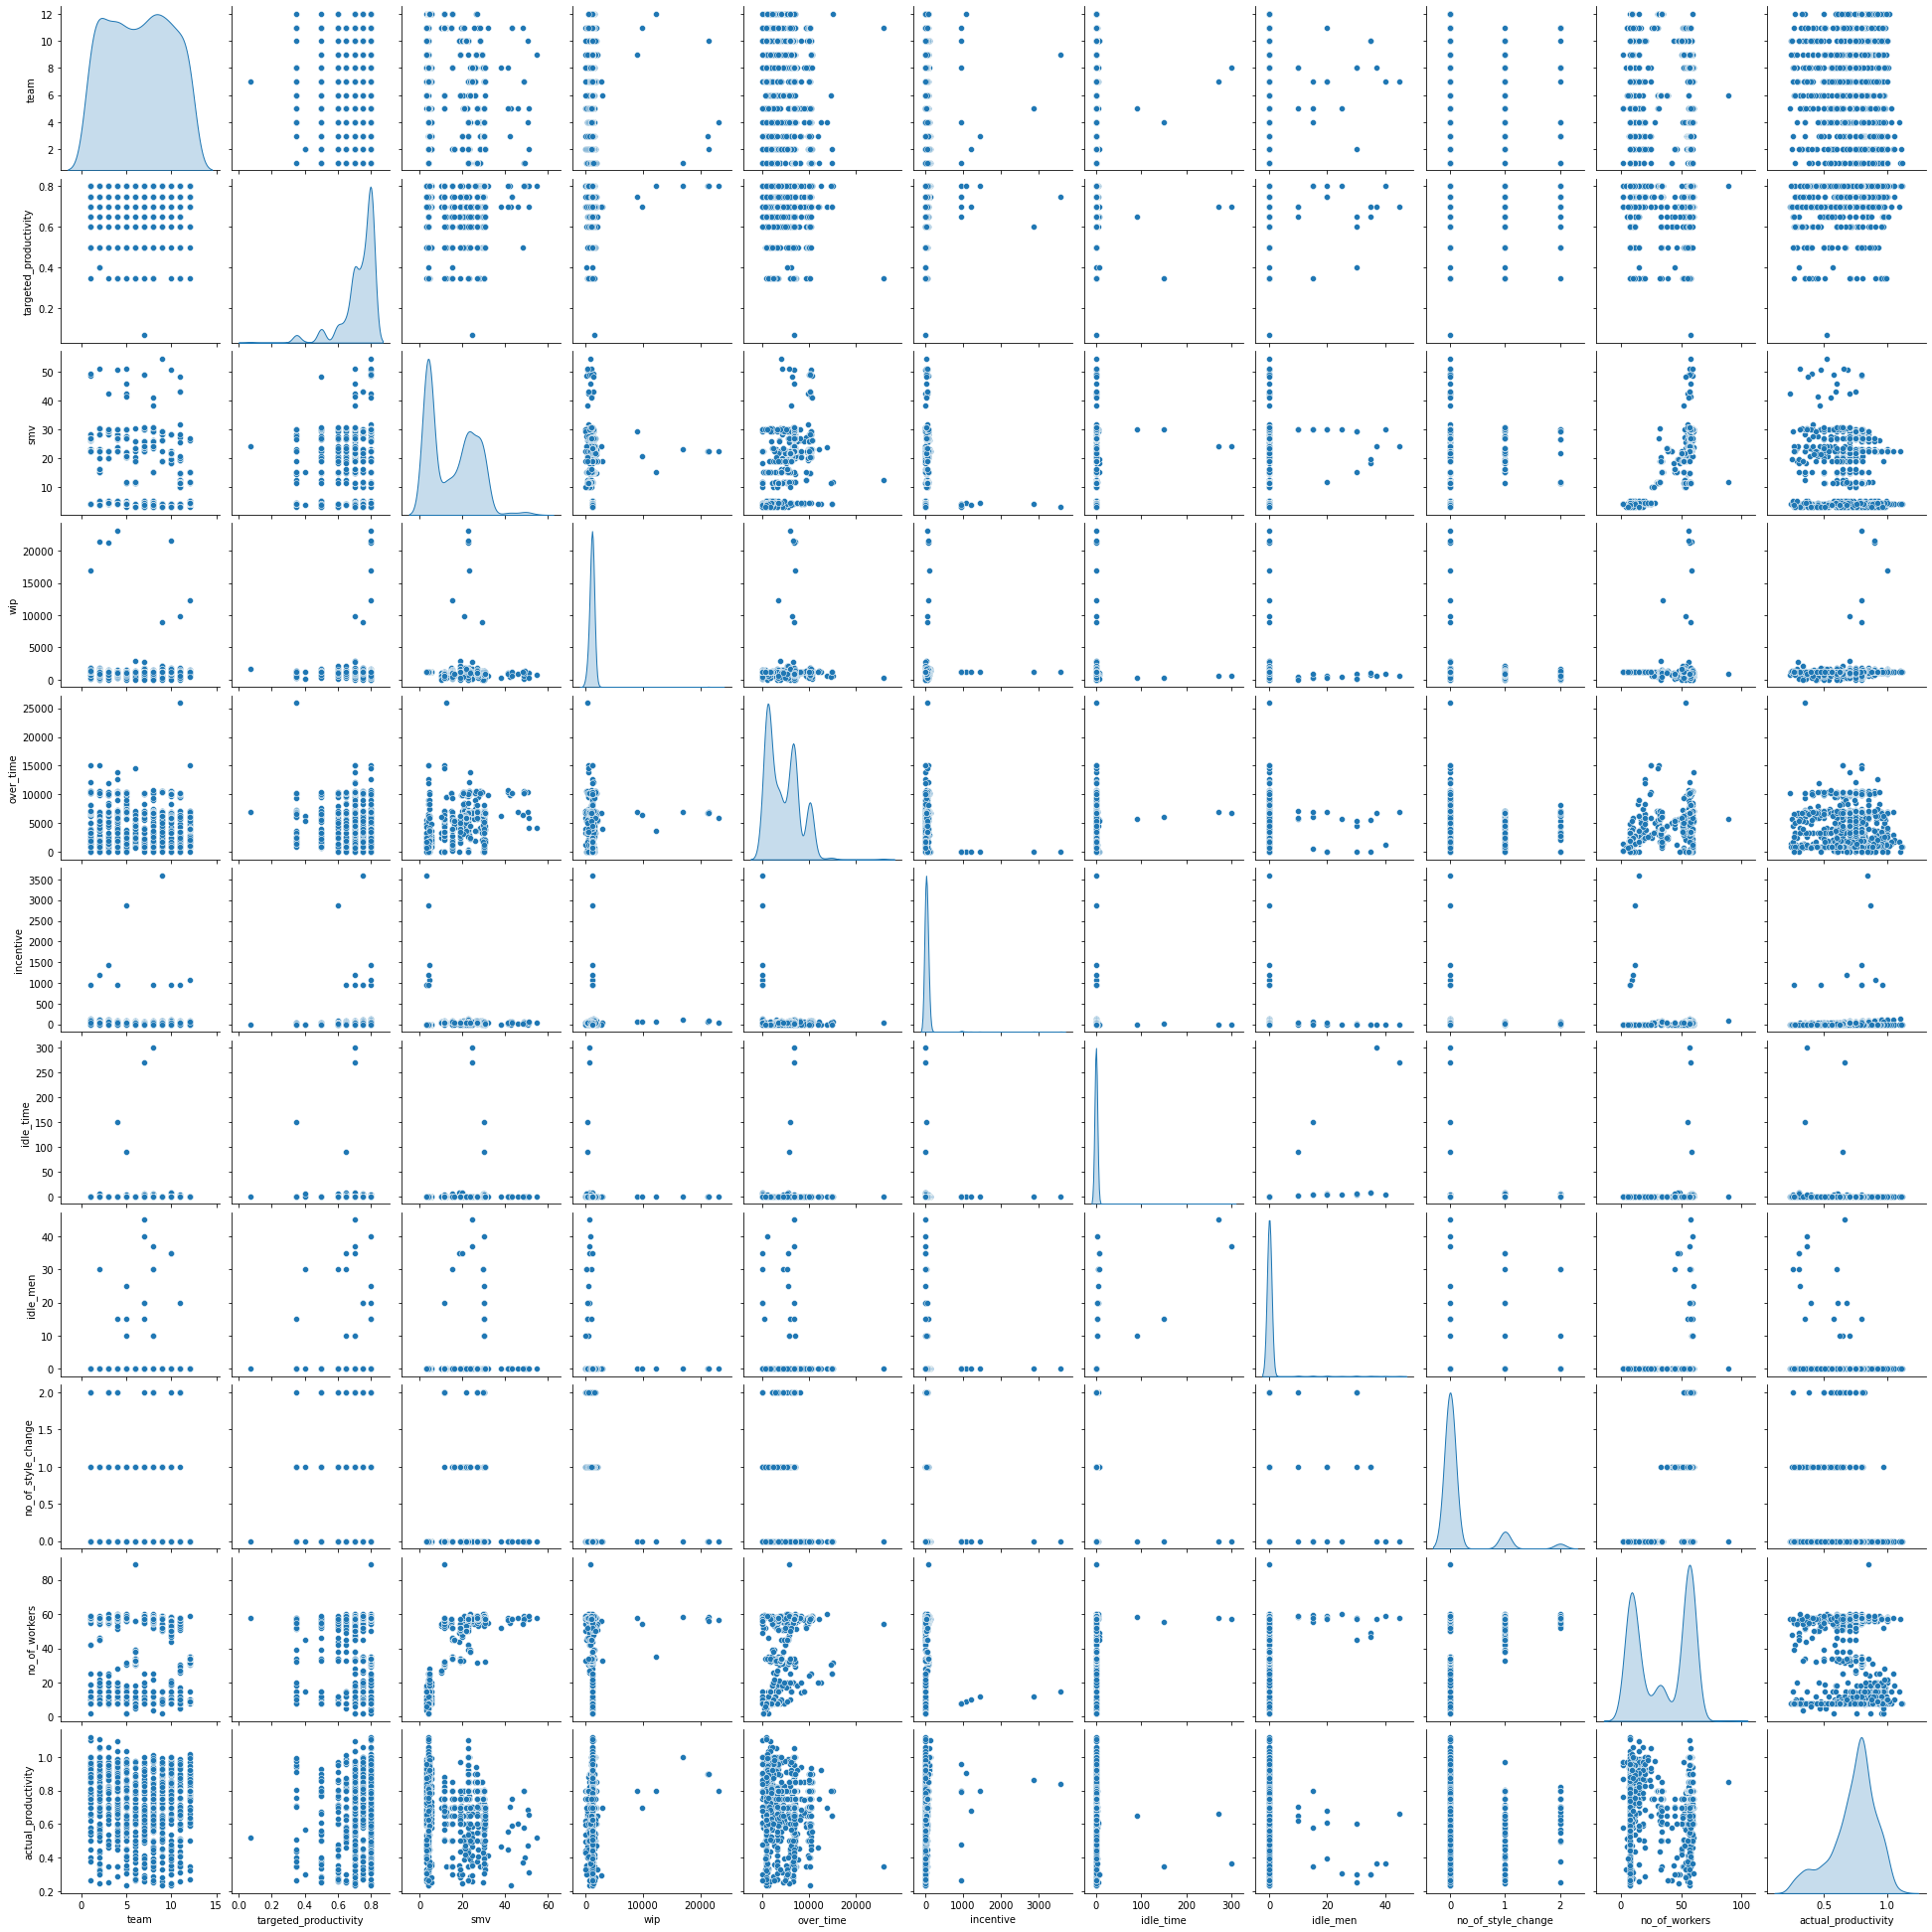

In [256]:
sns.pairplot(df,diag_kind='kde')

In [257]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Monday       199
Thursday     199
Saturday     187
Name: day, dtype: int64

### Daywise Distributions

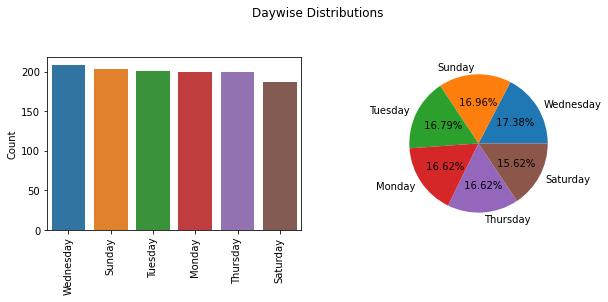

In [258]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
day_counts=df['day'].value_counts()
sns.barplot(y=day_counts,x=day_counts.index)
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.subplot(2,2,2)
plt.pie(df['day'].value_counts(),labels=df['day'].value_counts().index,autopct=lambda x: f'{x: .2f}%')
plt.suptitle('Daywise Distributions')
plt.show()

In [259]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [260]:
# Found that there are white spaces in department column and we need to trim it.
df['department']=df['department'].apply(str.strip)

In [261]:
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

### Departmentwise Distributions

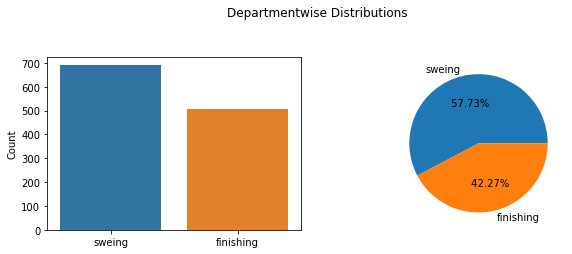

In [262]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
dept_count = df['department'].value_counts()
sns.barplot(x=dept_count.index,y=dept_count)
plt.ylabel('Count')
plt.subplot(2,2,2)
plt.pie(df['department'].value_counts(),labels=df['department'].value_counts().index,autopct=lambda x: f'{x: .2f}%')
plt.suptitle('Departmentwise Distributions')
plt.show()

### Teamno Distributions

In [263]:
df['team'].value_counts()

8     109
2     109
4     105
1     105
9     104
10    100
12     99
7      96
3      95
6      94
5      93
11     88
Name: team, dtype: int64

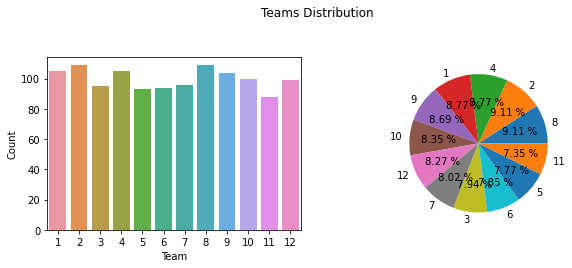

In [264]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
team_count=df['team'].value_counts()
sns.barplot(x=team_count.index,y=team_count)
plt.ylabel('Count')
plt.xlabel('Team')
plt.subplot(2,2,2)
plt.pie(df['team'].value_counts(),labels=df['team'].value_counts().index,autopct=lambda x: f'{x: .2f} %')
plt.suptitle('Teams Distribution')
plt.show()

In [265]:
# Continous feature analysis

def continous_feature(fld):
    plt.figure(figsize=(10,7))
    plt.subplot(2,2,1)
    plt.hist(fld)
    plt.subplot(2,2,2)
    sns.boxplot(fld)
    plt.suptitle(fld.name + ' Distribution')
    plt.show()
    plt.close()
    

### No. of workers

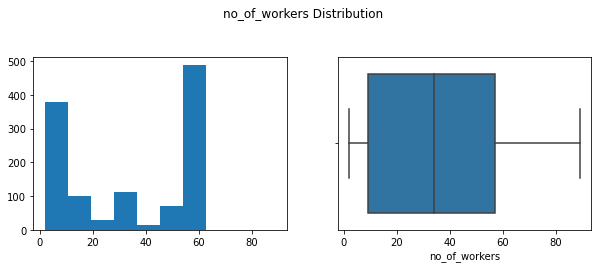

In [266]:
continous_feature(df.no_of_workers)

### No. of style change

In [267]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

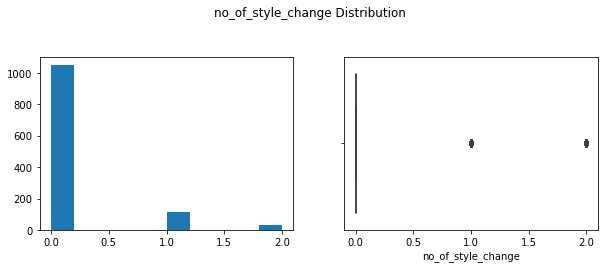

In [268]:
continous_feature(df.no_of_style_change)

### Targeted productivity

In [269]:
df['targeted_productivity'].value_counts()

0.80    540
0.70    242
0.75    216
0.65     63
0.60     57
0.50     49
0.35     27
0.40      2
0.07      1
Name: targeted_productivity, dtype: int64

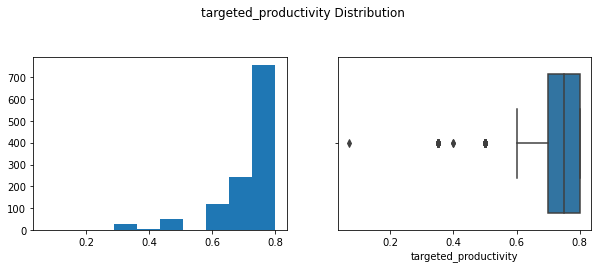

In [270]:
continous_feature(df.targeted_productivity)

### SMV

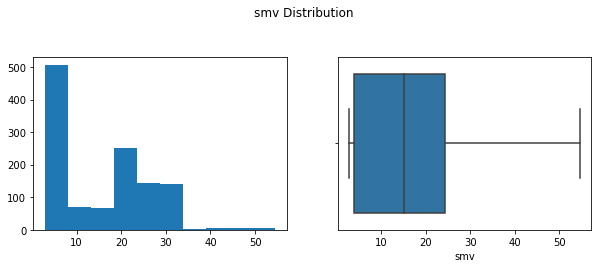

In [271]:
continous_feature(df.smv)

### WIP

In [272]:
df['wip'].isnull().sum()

0

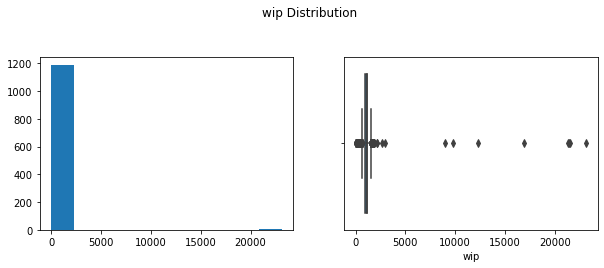

In [273]:
continous_feature(df.wip)

### Overtime

In [274]:
df['over_time'].isnull().sum()

0

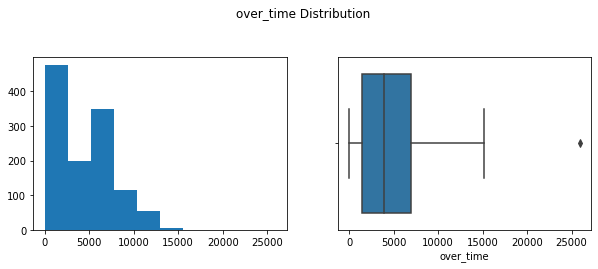

In [275]:
continous_feature(df.over_time)

### Incentive

In [276]:
df['incentive'].isnull().sum()

0

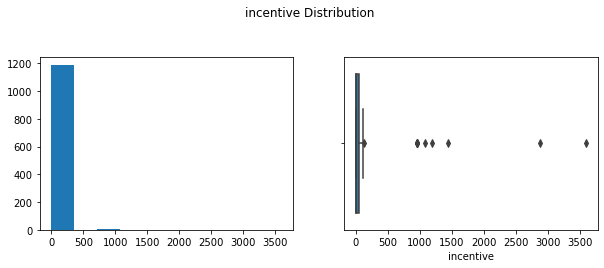

In [277]:
continous_feature(df.incentive)

### Idle time

In [278]:
df['idle_time'].isnull().sum()

0

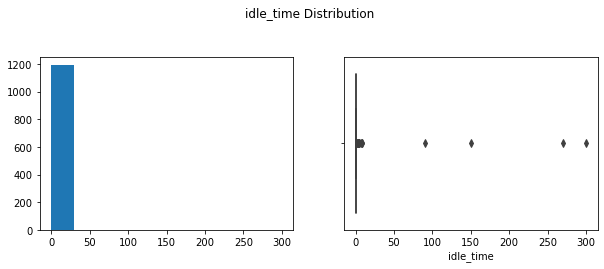

In [279]:
continous_feature(df.idle_time)

### Idle men

In [280]:
df['idle_men'].isnull().sum()

0

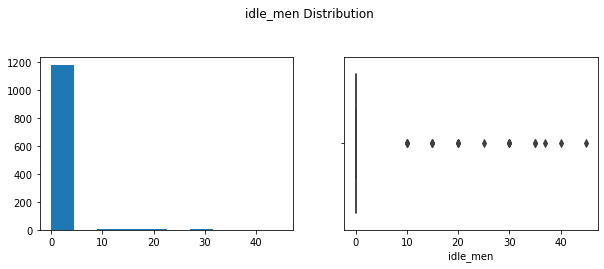

In [281]:
continous_feature(df.idle_men)

   ### Actual Productivity
  

In [282]:
df['actual_productivity'].isnull().sum()

0

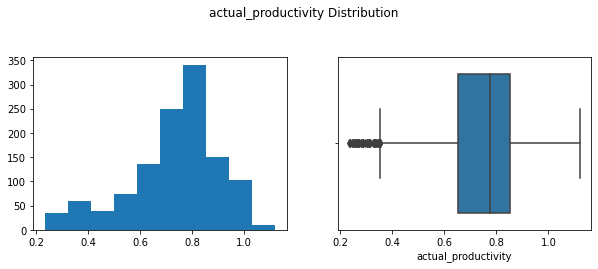

In [283]:
continous_feature(df.actual_productivity)

In [284]:
df.dtypes

date                     datetime64[ns]
quarter                          object
department                       object
day                              object
team                              int64
targeted_productivity           float64
smv                             float64
wip                             float64
over_time                         int64
incentive                         int64
idle_time                       float64
idle_men                          int64
no_of_style_change                int64
no_of_workers                   float64
actual_productivity             float64
dtype: object

In [285]:
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### ANALYSING FEATURE RELATIONSHIPS

In [286]:
import datetime

In [287]:
# Splitting date into day,month,year
#df['date_day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [288]:
df.drop('date',axis=1,inplace=True)
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015


 #### 1. How many years & month of data do we have for analysis ?

In [289]:
print('year :',df.year.unique())
print('month :',df.month.unique())

year : [2015]
month : [1 2 3]


 #### 2. Which dept has more productivity ?

In [290]:
producitivity = df.groupby('department').agg('sum')['actual_productivity']

In [291]:
producitivity = producitivity.to_frame()
display(producitivity)

,actual_productivity
department,
finishing,380.993038
sweing,498.911005


In [292]:
sns.reset_defaults()

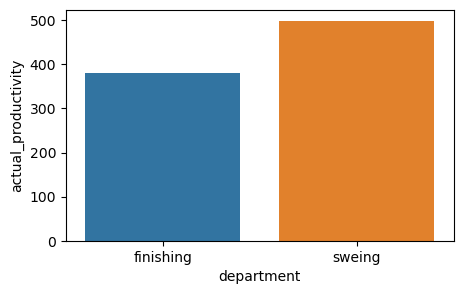

In [293]:
plt.figure(figsize=(5,3))
sns.barplot(data=producitivity,x=producitivity.index,y=producitivity.actual_productivity)
plt.show()

 #### 3. Does incentives improve productivity ?

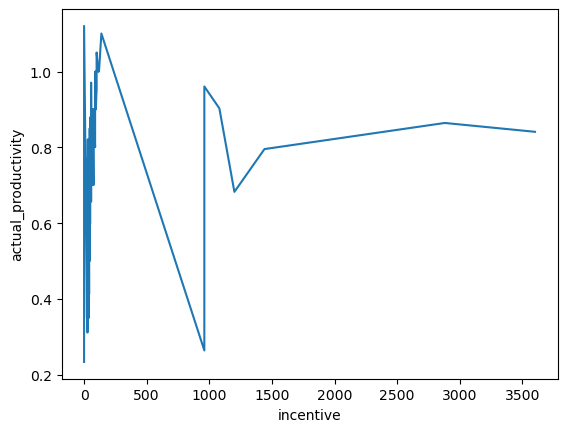

In [294]:
sns.lineplot(data=df,x='incentive',y='actual_productivity',estimator=None)
plt.show()

#### 4. Is there any relation between incentive and overtime?

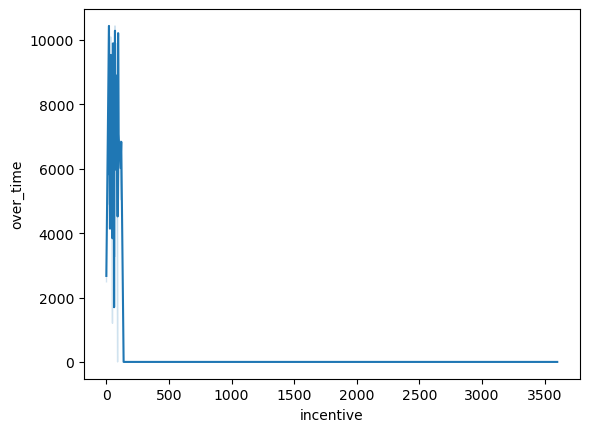

In [295]:
sns.lineplot(data=df, x='incentive',y='over_time')
plt.show()

 #### 5. Targetted productivity Vs Achieved productivity per month

In [296]:
produtivity_month = df.groupby('month').agg({'targeted_productivity':'mean','actual_productivity':'mean'})

In [297]:
produtivity_month

,targeted_productivity,actual_productivity
month,,
1,0.733487,0.755415
2,0.729729,0.717948
3,0.719575,0.718953


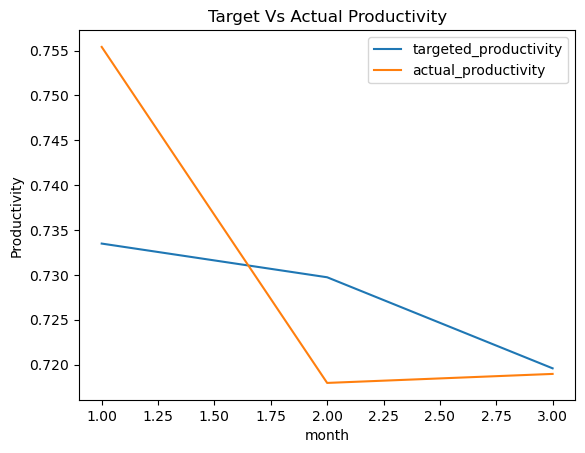

In [298]:
produtivity_month.plot()
plt.ylabel('Productivity')
plt.title('Target Vs Actual Productivity')
plt.show()

In [299]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015


#### 6. Overall productivity of team per month

In [300]:
overallproductivity = df.groupby(['month','team']).agg({'actual_productivity':'sum'})

In [301]:
type(overallproductivity)

pandas.core.frame.DataFrame

In [302]:
overallproductivity.reset_index(inplace=True)

In [303]:
sns.reset_defaults()

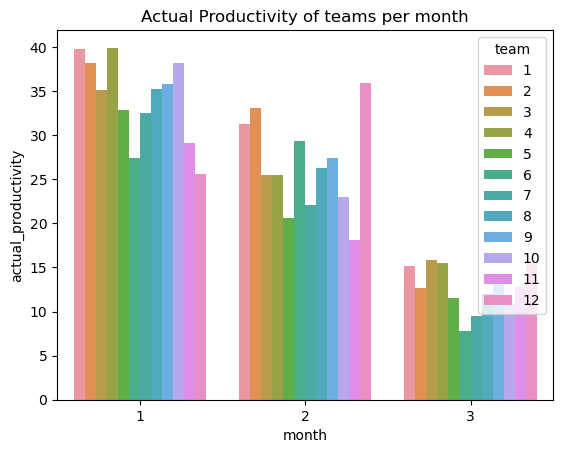

In [304]:
sns.barplot(data=overallproductivity,x='month',y='actual_productivity',hue='team')
plt.title('Actual Productivity of teams per month')
plt.show()

#### 7. Which working day has more productivity ?

In [305]:
more_productivity = df.groupby('day').agg({'actual_productivity':'mean'})

In [306]:
more_productivity.reset_index(inplace=True)

In [307]:
sns.reset_defaults()

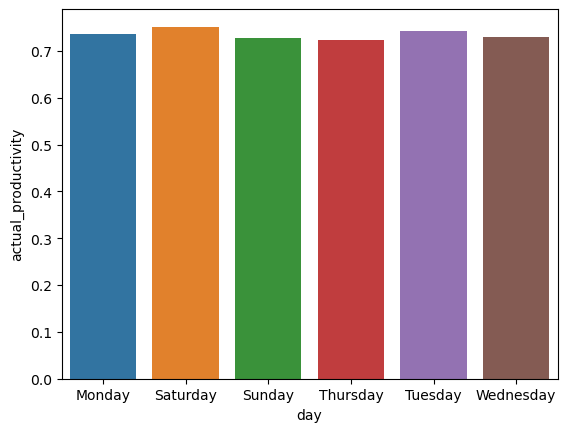

In [308]:
sns.barplot(data=more_productivity,x='day',y='actual_productivity')
plt.show()

#### 8. Which team has more idle employees ?

In [309]:
idle_emp = df.groupby('team').agg({'idle_men': 'sum'})
idle_emp

,idle_men
team,
1,0
2,30
3,0
4,15
5,50
6,0
7,140
8,117
9,0


In [310]:
sns.reset_defaults()

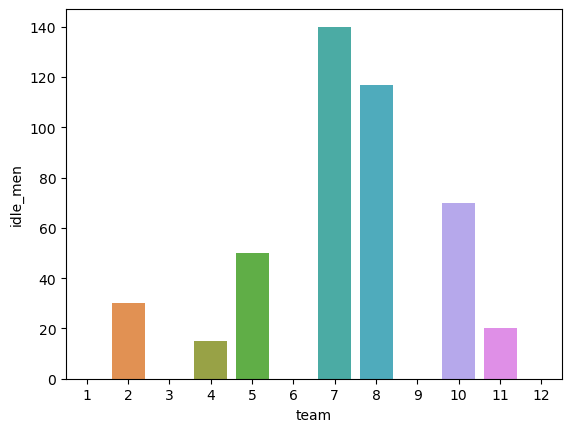

In [311]:
sns.barplot(data=idle_emp,x=idle_emp.index,y='idle_men')
plt.show()

### DATA WRANGLING

In [312]:
df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month,year
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1,2015
1,Quarter1,finishing,Thursday,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,1,2015
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1,2015
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,1190.0,960,0,0.0,0,0,8.0,0.628333,3,2015
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,1190.0,960,0,0.0,0,0,8.0,0.625625,3,2015
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,1190.0,960,0,0.0,0,0,8.0,0.625625,3,2015
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,1190.0,1800,0,0.0,0,0,15.0,0.505889,3,2015


In [313]:
df.dtypes

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
month                      int64
year                       int64
dtype: object

In [314]:
# year 2015 is common in this dataset, hence we can drop it.

df.drop('year',axis=1,inplace=True)

In [315]:
# Feature - quarter is least significant & hence we can drop it.

df.drop('quarter',axis=1,inplace=True)

In [316]:
df.isnull().sum()

department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
month                    0
dtype: int64

In [317]:
df.dtypes

department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
month                      int64
dtype: object

In [318]:
# to check categorical column dtypes

cat_col = [col for col in df.columns if df[col].dtype == 'O']
cat_col

['department', 'day']

In [319]:
continous_col = [col for col in df.columns if df[col].dtype != 'O']
continous_col

['team',
 'targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity',
 'month']

### HANDLING CATEGORICAL DATA FEATURE ENCODING

In [320]:
## Nominal data --> one hot encoding
## Ordinal data --> Label encoding

In [321]:
categorical = df[cat_col]
categorical.head()

,department,day
0,sweing,Thursday
1,finishing,Thursday
2,sweing,Thursday
3,sweing,Thursday
4,sweing,Thursday


In [322]:
## One hot encoding  of categorical column - Department

department = pd.get_dummies(categorical['department'])
department

,finishing,sweing
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
1192,1,0
1193,1,0
1194,1,0
1195,1,0


In [323]:
day = pd.get_dummies(categorical['day'])
day

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
...,...,...,...,...,...,...
1192,0,0,0,0,0,1
1193,0,0,0,0,0,1
1194,0,0,0,0,0,1
1195,0,0,0,0,0,1


In [324]:
df1 = pd.concat([categorical,department,day,df[continous_col]],axis=1)

In [325]:
df1.head()

,department,day,finishing,sweing,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,...,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,sweing,Thursday,0,1,0,0,0,1,0,0,...,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,finishing,Thursday,1,0,0,0,0,1,0,0,...,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,1
2,sweing,Thursday,0,1,0,0,0,1,0,0,...,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,sweing,Thursday,0,1,0,0,0,1,0,0,...,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,sweing,Thursday,0,1,0,0,0,1,0,0,...,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


In [326]:
df1.drop(['department','day'],axis=1,inplace=True)

In [327]:
df1.head()

,finishing,sweing,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,0,1,0,0,0,1,0,0,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,1
1,1,0,0,0,0,1,0,0,1,0.75,3.94,1190.0,960,0,0.0,0,0,8.0,0.886500,1
2,0,1,0,0,0,1,0,0,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
3,0,1,0,0,0,1,0,0,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,1
4,0,1,0,0,0,1,0,0,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,1


In [328]:
df1.shape

(1197, 20)

In [329]:
def plot(df,col):
    fig,(ax1,ax2) = plt.subplots(2,1)
    sns.distplot(df[col],ax=ax1)
    sns.boxplot(df[col],ax=ax2)

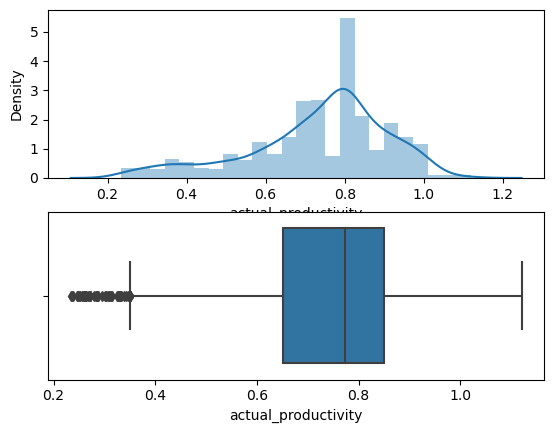

In [330]:
plot(df1,'actual_productivity')

In [331]:
# Separeting dependent and independent variabLe

X_all = df1.drop('actual_productivity',axis=1)

In [332]:
X_all.shape

(1197, 19)

In [333]:
from sklearn.preprocessing import MinMaxScaler

In [334]:
scaler = MinMaxScaler()

In [335]:
X = scaler.fit_transform(X_all)

In [336]:
X

array([[0.        , 1.        , 0.        , ..., 0.        , 0.65517241,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.06896552,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.32758621,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.        , 0.06896552,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.14942529,
        1.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.04597701,
        1.        ]])

In [337]:
y = df1['actual_productivity']

In [338]:
y.dtypes

dtype('float64')

In [339]:
# Splitting the dataset into training and testing data

In [340]:
from sklearn.model_selection import train_test_split

In [341]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [342]:
from sklearn import metrics

In [343]:
#import pickle

In [344]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training Score: {}'.format(model.score(X_train,y_train)))
    print('Testing Score: {}'.format(model.score(X_test,y_test)))
    y_prediction = model.predict(X_test)
    #print('Predictions are \n {}'.format(y_prediction))
    #print('\n')
    df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
    # Finding the difference between the original and predicted
    df2['difference'] = df2.Predicted - df2.Actual
    print('Sample comparison for actual and predicted target feature: ')
    display(df2.head())
    r2_score = metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)
    

### Train And Evaluate Linear Regression

In [345]:
from sklearn.linear_model import LinearRegression

Training Score: 0.29290052218763607
Testing Score: 0.2515874869813274
Sample comparison for actual and predicted target feature: 


,Actual,Predicted,difference
430,0.700437,0.632324,-0.068113
13,0.705917,0.671143,-0.034774
390,0.460579,0.745850,0.285271
363,0.700170,0.751953,0.051783
1031,0.800116,0.760742,-0.039374


r2 score: 0.2515874869813274
MAE: 0.10085298379010417
MSE: 0.01949388204999152
RMSE: 0.13962049294423623


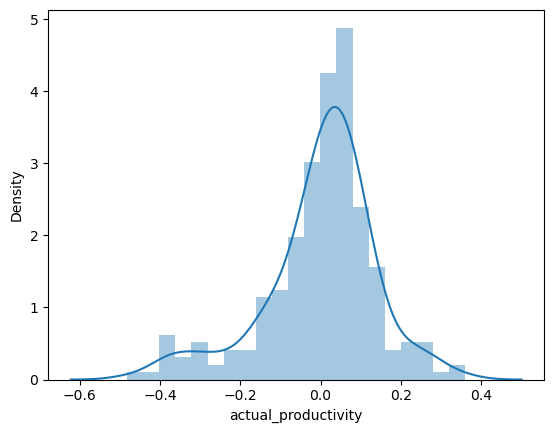

In [346]:
predict(LinearRegression())

In [347]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [348]:
from sklearn.model_selection import cross_val_score,GridSearchCV

In [349]:
from xgboost import XGBRegressor

### Train And Evaluate Lasso

Training Score: 0.0
Testing Score: -0.0006569667599358731
Sample comparison for actual and predicted target feature: 


,Actual,Predicted,difference
430,0.700437,0.734262,0.033825
13,0.705917,0.734262,0.028345
390,0.460579,0.734262,0.273683
363,0.700170,0.734262,0.034091
1031,0.800116,0.734262,-0.065854


r2 score: -0.0006569667599358731
MAE: 0.12336489053448713
MSE: 0.026064087041839434
RMSE: 0.16144375813836667


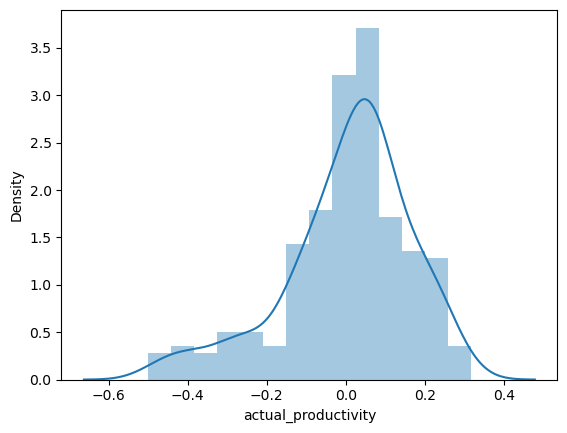

In [350]:
predict(Lasso())

### Train And Evaluate XG Boost Classifier

Training Score: 0.9703764081928296
Testing Score: 0.4163105526865849
Sample comparison for actual and predicted target feature: 


,Actual,Predicted,difference
430,0.700437,0.673763,-0.026673
13,0.705917,0.634894,-0.071023
390,0.460579,0.714457,0.253879
363,0.700170,0.697842,-0.002328
1031,0.800116,0.688826,-0.111290


r2 score: 0.4163105526865849
MAE: 0.07934628778343683
MSE: 0.015203344468224526
RMSE: 0.12330184292306634


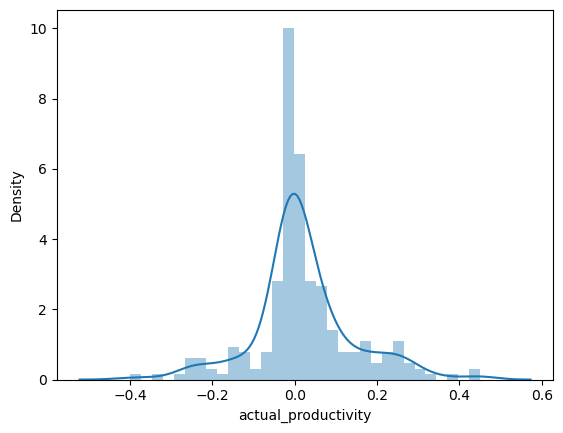

In [351]:
predict(XGBRegressor())

### Train and Evaluate Ridge Classifier

Training Score: 0.2895166759389527
Testing Score: 0.2492269294606022
Sample comparison for actual and predicted target feature: 


,Actual,Predicted,difference
430,0.700437,0.644324,-0.056113
13,0.705917,0.673050,-0.032867
390,0.460579,0.750680,0.290102
363,0.700170,0.742061,0.041890
1031,0.800116,0.760572,-0.039544


r2 score: 0.2492269294606022
MAE: 0.10017828936145591
MSE: 0.019555367432826223
RMSE: 0.13984050712446028


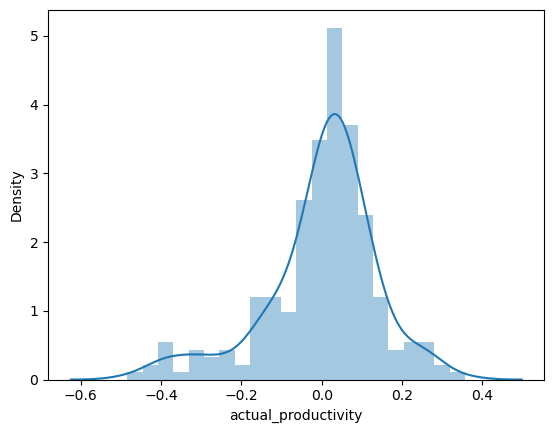

In [352]:
predict(Ridge())

### Model Tuning

In [354]:
param_tuning={
    'learning_rate' : [0.01,0.1,0.11,0.2],
    'max_depth' : [1,2,3,4,5],
    'min_child_weight' : [3,5,7,9],
    'subsample' : [0.5,0.7,0.9],
    'colsample_bytree' : [0.5,0.7,0.9],
    'n_estimators' : [25.50,100],
    'objective' : ['reg:squarederror']
}

In [355]:
gsearch = GridSearchCV(estimator=XGBRegressor(),param_grid=param_tuning,cv=2,n_jobs=-1,verbose=1)

In [356]:
gsearch.fit(X,y)

Fitting 2 folds for each of 1440 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 876 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done 1576 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 2476 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  1.9min finished


GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=...
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_

In [357]:
print('best_params = ',gsearch.best_params_)

best_params =  {'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 2, 'min_child_weight': 7, 'n_estimators': 100, 'objective': 'reg:squarederror', 'subsample': 0.7}


Training Score: 0.5580681856210058
Testing Score: 0.47548095821348724
Sample comparison for actual and predicted target feature: 


,Actual,Predicted,difference
430,0.700437,0.685660,-0.014777
13,0.705917,0.652240,-0.053677
390,0.460579,0.796493,0.335914
363,0.700170,0.700215,0.000045
1031,0.800116,0.693291,-0.106825


r2 score: 0.47548095821348724
MAE: 0.07920432798163247
MSE: 0.013662134392060524
RMSE: 0.11688513332353488


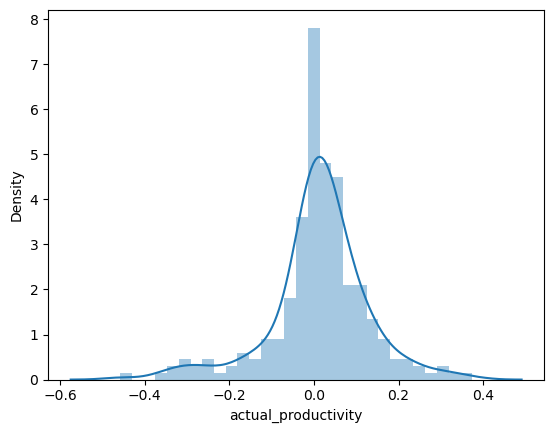

In [358]:
predict(XGBRegressor(colsample_bytree=0.5,learning_rate=0.1,max_depth=2,min_child_weight=7,n_estimators=100,objective='reg:squarederror',subsample=0.7))